In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from scipy.integrate import solve_ivp
from matplotlib import animation
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import PillowWriter

In [2]:
# characteristic values:
G = 6.67e-11
M = 5.972e24
L = 149597870700 

# mass in the unit of earth
m1 = 1 # earth 
m2 = 0.02 # asteroid

# position in the unit of AU
x1_0 = 0 # initial position is one earth-sun distance away from the sun
y1_0 = 0
x2_0 = 0.75
y2_0 = 0

# escape velocity
r = (x2_0**2 + y2_0**2)**0.5
v = (2*m1/r)**0.5 # this calculate the required escape velocity within some kind of orbit
# velocity in the unit of AU per time square 
vx1_0 = 0
vy1_0 = 0 #circular motion v=sqrt(a*r) with a=m2 (since G=1, r12=1)
vx2_0 = 0
vy2_0 = 0.6*v

In [3]:
# error check in escape velocity 
v_real = v * (G*M/L)**0.5
v_earth = (2*G*M/(r*L))**0.5
v_earth

84.26446671319663

In [4]:
def dSdt(S, t):
    x1, y1, x2, y2, vx1, vy1, vx2, vy2 = S
    r12 = np.sqrt((x2-x1)**2 + (y2-y1)**2)
    return [ vx1,
            vy1,
            vx2,
            vy2,
            m2/r12**3 * (x2-x1),
            m2/r12**3 * (y2-y1),
            m1/r12**3 * (x1-x2),
            m1/r12**3 * (y1-y2)]


In [5]:
t = np.linspace(0, 100,10000) 

In [6]:
sol = odeint(dSdt, y0=[x1_0, y1_0, x2_0, y2_0, vx1_0, vy1_0, vx2_0, vy2_0],
             t=t)

In [7]:
# 1) Convert to seconds (SI unit) using equation above
tt = 1/np.sqrt(G * M / (L)**3 ) 
# 2) Convert from seconds to years
tt = tt / (60*60 * 24* 365.25) * np.diff(t)[0] # per time step (in years)

In [8]:
# this is the solution for position
x1 = sol.T[0]
y1 = sol.T[1]
x2 = sol.T[2]
y2 = sol.T[3]
# this is the solution for velocity 
vx2 = sol.T[6]
vy2 = sol.T[7]
v2 = (vx2**2 + vy2**2)**0.5
v2_real = v2 * (G*M/L)**0.5

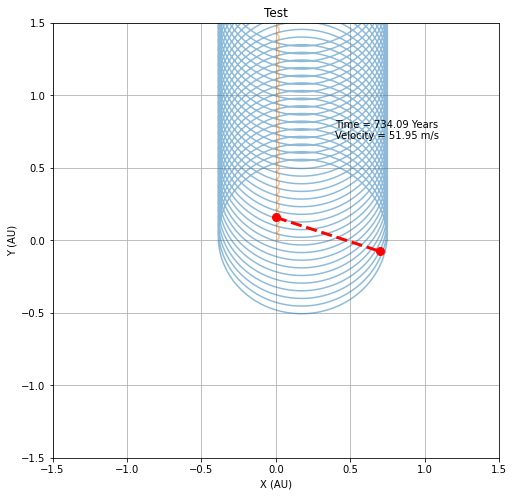

In [9]:
def animate(i):
    ln1.set_data([x1[i], x2[i]], [y1[i], y2[i]])
    text.set_text('Time = {:.2f} Years\n'.format(i*tt)+'Velocity = {:.2f} m/s'.format(v2_real[i]))
fig, ax = plt.subplots(1,1, figsize=(8,8))
ax.grid()
plt.plot(x2[:], y2[:], alpha = 0.5)
plt.plot(x1[:], y1[:], alpha = 0.5)
ln1, = plt.plot([], [], 'ro--', lw=3, markersize=8)
text = plt.text(0.4, 0.7, '')
plt.xlabel('X (AU)')
plt.ylabel('Y (AU)')
plt.title('Test')
ax.set_ylim(-1.5, 1.5)
ax.set_xlim(-1.5, 1.5)
ani = animation.FuncAnimation(fig, animate, frames=800, interval=1)
ani.save('mass_acretion.gif', writer='pillow',fps=30)